# Predicting the sales price of bulldozers using machine learning.

In this notebook, we're going to go through an example machine learning project
with the goal of predicting the price of bulldozers.

## 1. Problem definition

Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

## 2. Data

The data is dowloaded from kaggle bluebook for bulldozers competetion.
The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

link : https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

## 3. Evaluation

The evaluation of this competition is the RMSLE(root mean squared log error) between the actual and 
predicted auction prices.

## 4. Features

A data dictionary detailing all of the features of the dataset is in data_dictionary.xlxs(exel_file)

link : https://docs.google.com/spreadsheets/d/1NVLAgwPAva1csvXOigwcJ_iVfZyx6Odc_mO5qWtWk20/edit?usp=sharing

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Import the training and validation sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

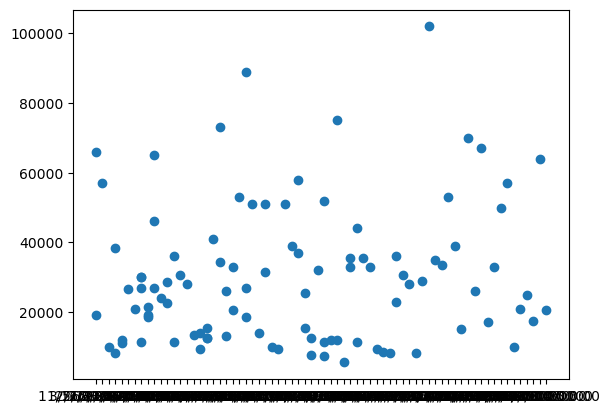

In [6]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:100], df['SalePrice'][:100]);

In [10]:
df.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

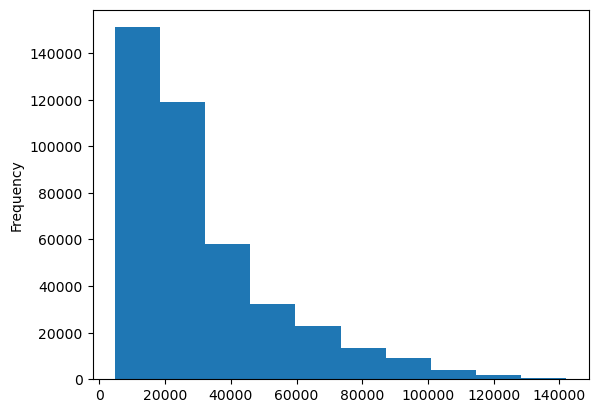

In [9]:
df.SalePrice.plot.hist();

### Parsing dates

when we work with time series data, we want to enrich the time and date 
component as much as possible.


we can do that by simply telling pandas which of our columns has dates in it.
using the `parse_dates` parameter.

In [11]:
# Import data again but this time parse dates.
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [12]:
df.saledate.dtype

dtype('<M8[ns]')

In [13]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

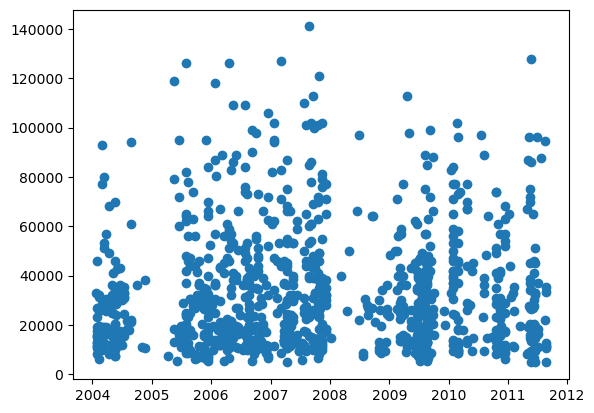

In [15]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [17]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [18]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### sort dataframe by saledate

When working with time series data, it is a good idea to sort it by date.

In [19]:
# sort dataframe in dateorder
df.sort_values(by=['saledate'], inplace=True, ascending=True)

df.saledate.head(10)


205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [20]:
# keep a original copy
df_org = df.copy()
df_org.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Feature Engineering

Add datetime parameters for `saledate` column

In [21]:
df['saleyear'] = df.saledate.dt.year
df['salemonth'] = df.saledate.dt.month
df['saleday'] = df.saledate.dt.day

In [23]:
df.drop('saledate', axis=1, inplace=True)

In [24]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [25]:
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modeling 

### Let's build a machine learning model.


In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
Name: SalePrice, dtype: float64

In [29]:
X.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B
fiBaseModel,TD20,A66,D7,A62,D3


## Convert non numeric datas into catagories

one way we can turn all our data into numbers is by converting them into pandas catagories.


In [33]:
df.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31


In [32]:
# find columns which are strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(f'{label} is a string')

UsageBand is a string
fiModelDesc is a string
fiBaseModel is a string
fiSecondaryDesc is a string
fiModelSeries is a string
fiModelDescriptor is a string
ProductSize is a string
fiProductClassDesc is a string
state is a string
ProductGroup is a string
ProductGroupDesc is a string
Drive_System is a string
Enclosure is a string
Forks is a string
Pad_Type is a string
Ride_Control is a string
Stick is a string
Transmission is a string
Turbocharged is a string
Blade_Extension is a string
Blade_Width is a string
Enclosure_Type is a string
Engine_Horsepower is a string
Hydraulics is a string
Pushblock is a string
Ripper is a string
Scarifier is a string
Tip_Control is a string
Tire_Size is a string
Coupler is a string
Coupler_System is a string
Grouser_Tracks is a string
Hydraulics_Flow is a string
Track_Type is a string
Undercarriage_Pad_Width is a string
Stick_Length is a string
Thumb is a string
Pattern_Changer is a string
Grouser_Type is a string
Backhoe_Mounting is a string
Blade_Type is

In [34]:
# This line will change all of the string value into categorical values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [35]:
df.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31


In [36]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
df.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True)

In [39]:
df.state.cat.codes.head()

205615    43
274835     8
141296     8
212552     8
62755      8
dtype: int8

In [40]:
df.state.head()

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

### Means Texas = 43, Florida = 8
    
#### Now we already have converted the non numerical data's into categorical values. But we still have a bunch of missing data...

In [42]:
# Check the missing data
df.isna().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [43]:
# save the changed data
df.to_csv('data/bluebook-for-bulldozers/train_tmp.csv',
          index=False)

## Fill missing values

### Fill numeric missing values

In [51]:
# find them
for lbl, con in df.items():
    if pd.api.types.is_numeric_dtype(con):
#         print(lbl)
        if pd.isnull(con).sum():
            print(lbl)

auctioneerID
MachineHoursCurrentMeter


In [82]:
# fill them with median
for lbl, con in df.items():
    if pd.api.types.is_numeric_dtype(con):
        if pd.isnull(con).sum():
            df[lbl+'_is_missing'] = pd.isnull(con)
            df[lbl] = con.fillna(con.median())

In [56]:
hund = np.full((1000), 100)
hund_bill = np.append(hund, 1000000)
np.mean(hund), np.mean(hund_bill), np.median(hund), np.median(hund_bill)

(100.0, 1098.901098901099, 100.0, 100.0)

In [68]:
nd = {'roll': [71, 72, 73, 74],
      'cgpa': [3.67, 3.88, 3.99, 3.76],
      'name': ['oitik', 'badhon', 'oshin', 'pritom']
     }
ndf = pd.DataFrame(nd)

In [76]:
ndf

,roll,cgpa,name
0,71,3.67,oitik
1,72,3.88,badhon
2,73,3.99,oshin
3,74,3.76,pritom


In [81]:
for val, cal in ndf.items():
    print(f'labels = {val} content{cal}')

labels = roll content0    71
1    72
2    73
3    74
Name: roll, dtype: int64
labels = cgpa content0    3.67
1    3.88
2    3.99
3    3.76
Name: cgpa, dtype: float64
labels = name content0     oitik
1    badhon
2     oshin
3    pritom
Name: name, dtype: object


In [83]:
# Check if all is filled?
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [87]:
# df.isna().sum()
# so this makes sense

In [91]:
count = 0
for val in df['auctioneerID_is_missing']:
    if val == True:
        count+=1
count, df['auctioneerID_is_missing'].value_counts()

(20136,
 False    392562
 True      20136
 Name: auctioneerID_is_missing, dtype: int64)

In [92]:
# Check if all is filled?
for label, content in df.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [94]:
pd.Categorical(df['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [96]:
pd.Categorical(df['UsageBand'])

[NaN, NaN, NaN, NaN, NaN, ..., NaN, NaN, NaN, NaN, NaN]
Length: 412698
Categories (3, object): ['High' < 'Low' < 'Medium']

In [97]:
pd.Categorical(df['UsageBand']).codes+1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [98]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes + 1

In [99]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [100]:
# Check if all is filled?
for label, content in df.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [101]:
# Nothing comes up so all filled

In [102]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [103]:
# save the changed data
df.to_csv('data/bluebook-for-bulldozers/train_tmp.csv',
          index=False)

Now fit the data and continue modeling

In [104]:
len(df)

412698

In [105]:
%%time
# Instantiate model

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model

model.fit(df.drop('SalePrice', axis=1), df['SalePrice'])


CPU times: user 10min 50s, sys: 4.02 s, total: 10min 54s
Wall time: 1min 26s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [106]:
# Score the model
model.score(df.drop('SalePrice', axis=1), df['SalePrice'])

0.9875132974990518

In [107]:
from joblib import dump, load

# Save model to file
dump(model, filename='bulldozer_price_predict_model_1.joblib')

['bulldozer_price_predict_model_1.joblib']

In [108]:
# Import a saved model
# loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')